# Classification

## MNIST

In [ ]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

In [ ]:
mnist['DESCR']

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

In [ ]:
X,y = mnist['data'], mnist['target']
X.shape
y.shape

(70000,)

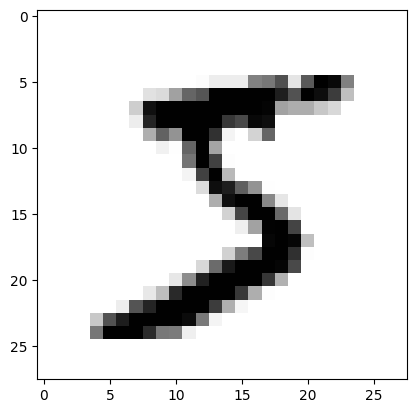

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X.iloc[0]

some_digit_image = some_digit.values.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary, interpolation="nearest")

In [ ]:
y[0]

'5'

In [ ]:
import numpy as np

y = y.astype(np.uint8)

In [ ]:
y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: uint8

In [ ]:
# The mnst is alreadt split into a training set and a test set

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [ ]:
y_train_5 = (y_train == 5)  # True for all 5s, False for all other digits
y_test_5 = (y_test == 5)  # True for all 5s, False for all other digits

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)

sgd_clf.fit(X_train, y_train_5)


SGDClassifier(random_state=42)

In [ ]:
type(X)

pandas.core.frame.DataFrame

In [ ]:
type(X.iloc[0])

pandas.core.series.Series

In [ ]:
sgd_clf.predict(X.iloc[[0]])

array([ True])

# Cross Validation 

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone


sk_fold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

for train_data, test_data in sk_fold.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    
    X_train_folds = X_train.iloc[train_data]
    y_train_folds = y_train_5.iloc[train_data]
    
    X_test_fold = X_train.iloc[test_data]
    y_test_fold = y_train_5.iloc[test_data]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.9669
0.91625
0.96785


In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [ ]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass  # Nothing to train

    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)  # Always predicts "not-5"

In [ ]:
cross_val_score(Never5Classifier(), X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

In [ ]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix

conf_mx = confusion_matrix(y_train_5, y_train_pred)
print(conf_mx)

[[53892   687]
 [ 1891  3530]]


In [ ]:
y_train_5_perfect_predictions = y_train_5
conf_mx_perfect = confusion_matrix(y_train_5, y_train_5_perfect_predictions)

print(conf_mx_perfect)

[[54579     0]
 [    0  5421]]


## Precision and Recall

In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score

print(recall_score(y_train_5, y_train_pred))
print(precision_score(y_train_5, y_train_pred))
print(f1_score(y_train_5, y_train_pred))

0.6511713705958311
0.8370879772350012
0.7325171197343846


In [ ]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

c:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([2164.22030239])

In [ ]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
print(y_some_digit_pred)

[ True]


In [ ]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
print(y_some_digit_pred)

[False]


In [ ]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [ ]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [ ]:
print(precisions)
print(recalls)
print(thresholds)

[0.09035    0.09035151 0.09035301 ... 1.         1.         1.        ]
[1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 3.68935621e-04
 1.84467810e-04 0.00000000e+00]
[-146348.56726174 -142300.00705404 -137588.97581744 ...   38871.26391927
   42216.05562787   49441.43765905]


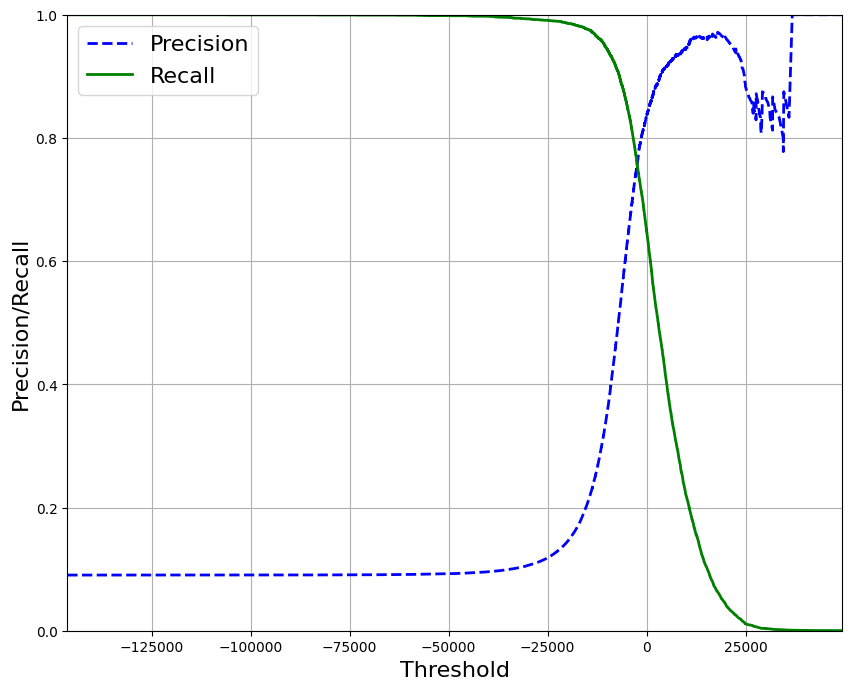

In [ ]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(10, 8))  # Make the plot taller
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.ylabel("Precision/Recall", fontsize=16)  # Added y-label
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])
    plt.xlim([thresholds.min(), thresholds.max()])  # Include negative thresholds
    plt.grid()
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

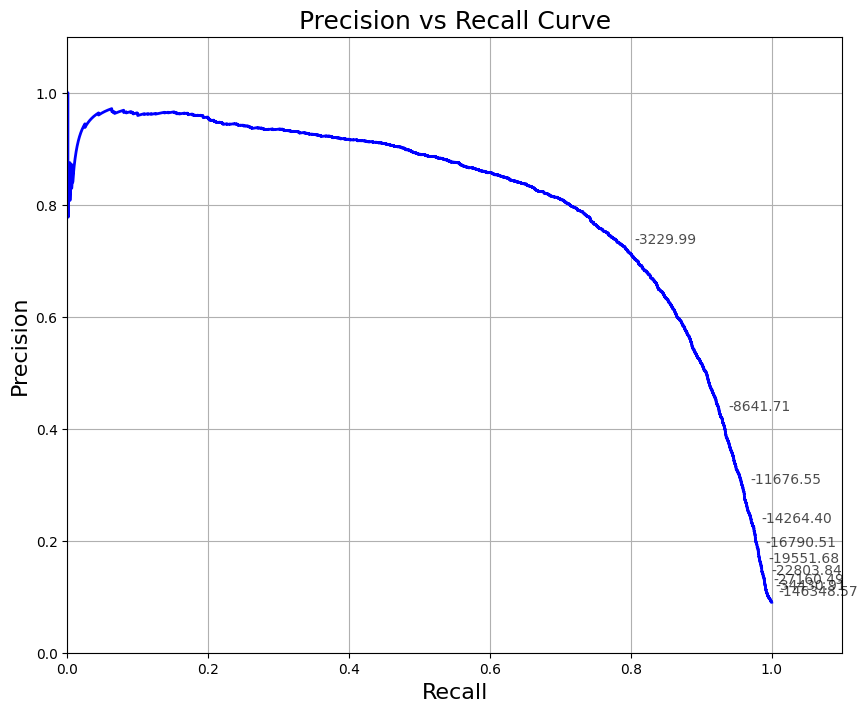

In [ ]:
def plot_precision_vs_recall(precisions, recalls, thresholds):
    plt.figure(figsize=(10, 8))
    plt.plot(recalls[:-1], precisions[:-1], "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.title("Precision vs Recall Curve", fontsize=18)
    plt.grid()
    
    # Add threshold annotations at key points
    step = len(thresholds) // 10  # Show ~10 threshold values
    for i in range(0, len(thresholds), step):
        plt.annotate(f'{thresholds[i]:.2f}', 
                    (recalls[i], precisions[i]),
                    textcoords="offset points", 
                    xytext=(5,5), 
                    fontsize=10,
                    alpha=0.7)
    
    plt.xlim([0, 1.1])
    plt.ylim([0, 1.1])

plot_precision_vs_recall(precisions, recalls, thresholds)

In [ ]:
threshold_90 = thresholds[np.argmax(precisions >= 0.90)]
print(f"Threshold for 90% precision: {threshold_90:.2f}")

Threshold for 90% precision: 3370.02


In [ ]:
y_train_pred  = (y_scores >= threshold_90)
print(f"Precision at threshold {threshold_90:.2f}: {precision_score(y_train_5, y_train_pred):.2f}")
print(f"Recall at threshold {threshold_90:.2f}: {recall_score(y_train_5, y_train_pred):.2f}")

Precision at threshold 3370.02: 0.90
Recall at threshold 3370.02: 0.48


In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

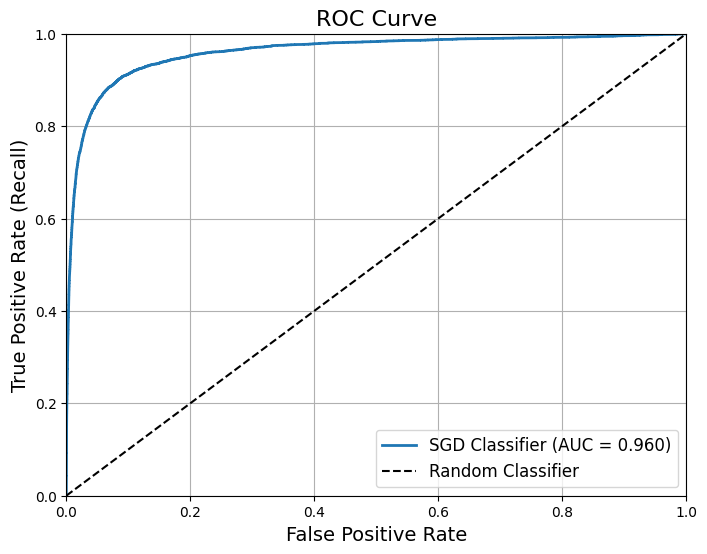

AUC Score: 0.960


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get ROC curve data
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')  # Diagonal line
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate (Recall)', fontsize=14)
    plt.title('ROC Curve', fontsize=16)
    plt.grid(True)
    plt.legend(fontsize=12)

# Calculate AUC score
auc_score = roc_auc_score(y_train_5, y_scores)

# Plot with AUC in label
plot_roc_curve(fpr, tpr, label=f'SGD Classifier (AUC = {auc_score:.3f})')
plt.show()

print(f"AUC Score: {auc_score:.3f}")

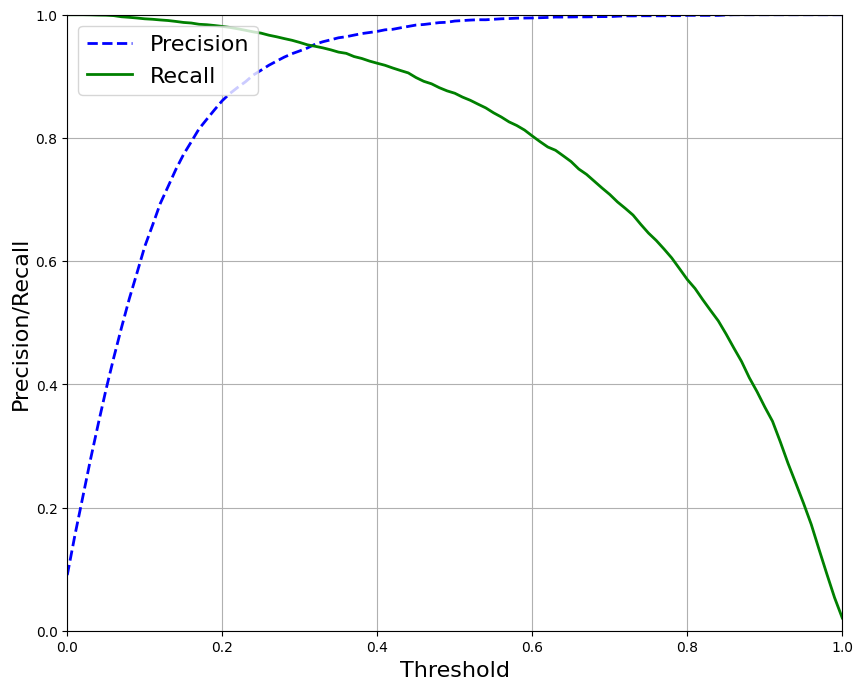

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)

predictionScores = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")
precisions, recalls, thresholds = precision_recall_curve(y_train_5, predictionScores[:, 1])
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

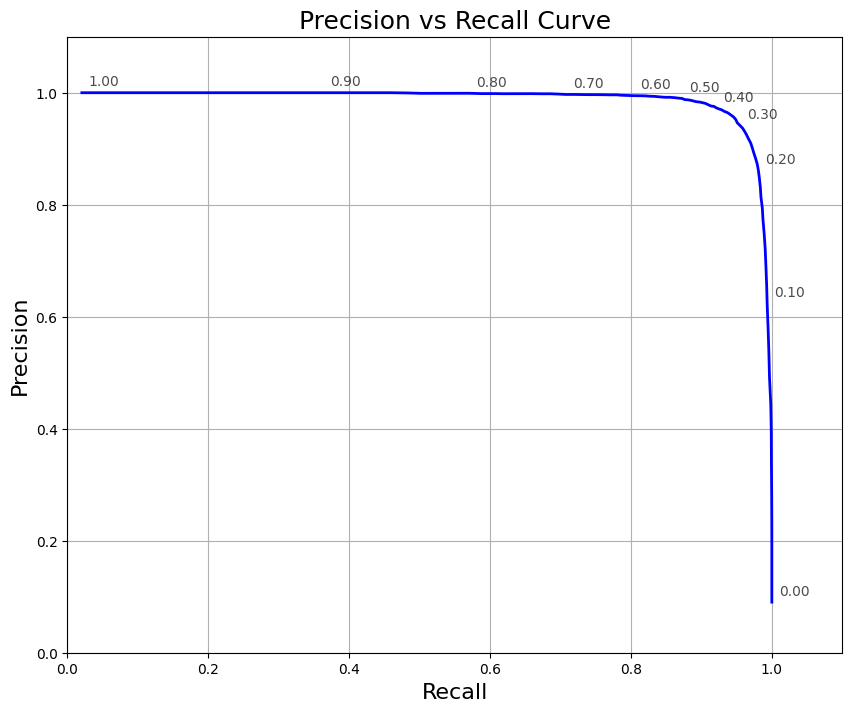

In [ ]:
plot_precision_vs_recall(precisions, recalls, thresholds)

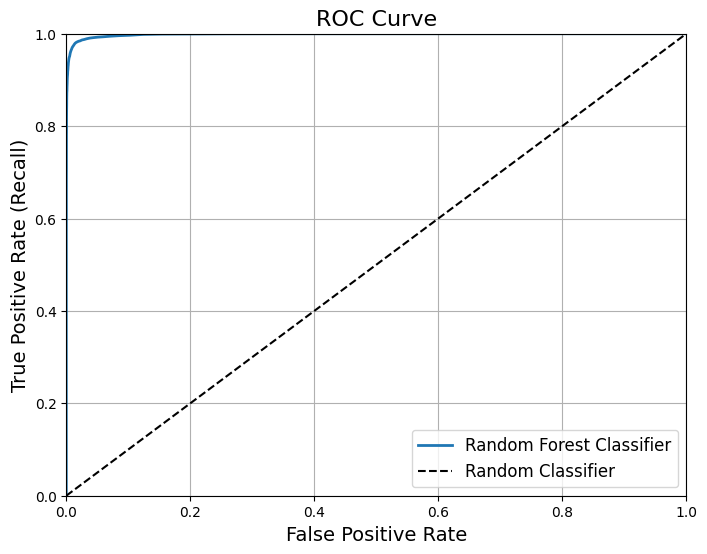

In [ ]:
fpr, tpr, thresholds = roc_curve(y_train_5, predictionScores[:, 1])
plot_roc_curve(fpr, tpr, label='Random Forest Classifier')

In [ ]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict(X_test)

array([7, 2, 1, ..., 8, 5, 6], dtype=uint8)

In [ ]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

c:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SGDClassifier(random_state=42))
ovr_clf.fit(X_train, y_train)
print(ovr_clf.predict([some_digit]))
print(len(ovr_clf.estimators_))

[5]
10


c:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(
c:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(
c:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(
c:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(
c:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fit

In [ ]:
cross_val_score(ovr_clf, X_train, y_train, cv=5, scoring="accuracy")

array([0.86025   , 0.86541667, 0.8665    , 0.84716667, 0.86741667])

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=5, scoring="accuracy")

In [ ]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_matrix = confusion_matrix(y_train, y_train_pred)
plt.matshow(conf_matrix, cmap=plt.cm.gray)

In [ ]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

In [ ]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [ ]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]
plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()